In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [105]:
df = pd.read_csv("datafiles/consommation-quotidienne-brute-regionale.csv", sep=";", index_col="date_heure", parse_dates=True)

In [106]:
df.head()

,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
date_heure,,,,,,,,,,,,
2013-01-21 09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
2013-01-21 09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2013-01-21 09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
2013-01-21 09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
2013-01-21 09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0


In [107]:
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index, utc=True, format='%Y-%m-%d %H:%M:%S%z')

In [108]:
df.columns

Index(['date', 'heure', 'code_insee_region', 'region',
       'consommation_brute_gaz_grtgaz', 'statut_grtgaz',
       'consommation_brute_gaz_terega', 'statut_terega',
       'consommation_brute_gaz_totale', 'consommation_brute_electricite_rte',
       'statut_rte', 'consommation_brute_totale'],
      dtype='object')

In [109]:
df = df.loc[df.region == "Hauts-de-France"]

# Question 1

<AxesSubplot: xlabel='date_heure'>

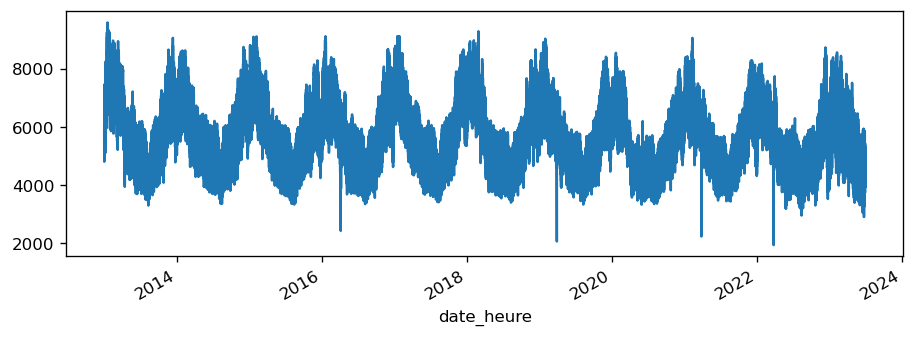

In [110]:
df.consommation_brute_electricite_rte.plot()

# Question 2

<AxesSubplot: xlabel='date_heure'>

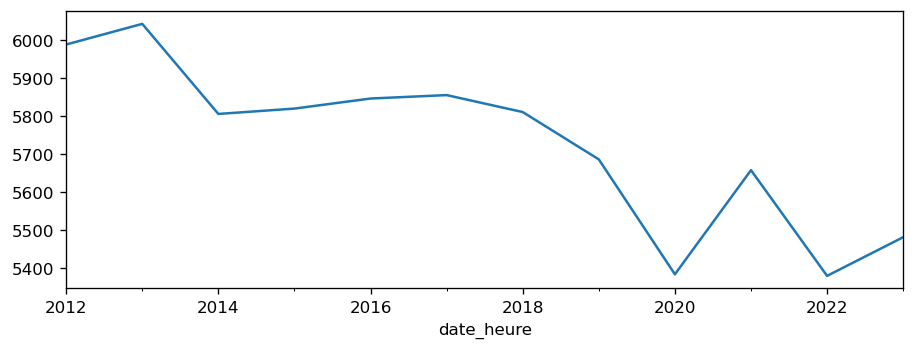

In [111]:
# a)
df.consommation_brute_electricite_rte.resample("Y").mean().plot()

<AxesSubplot: xlabel='date_heure'>

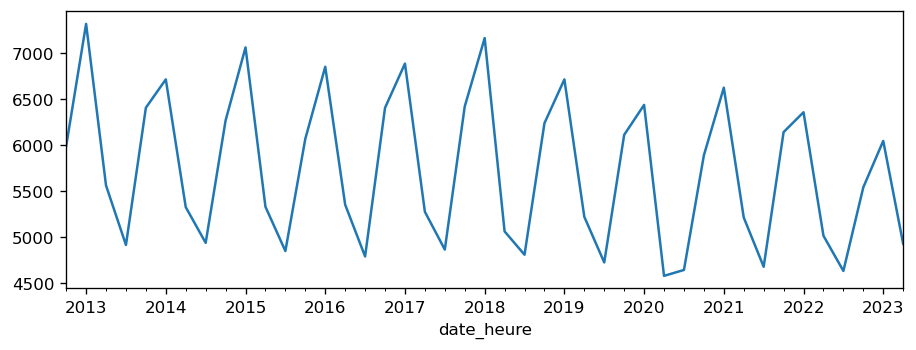

In [112]:
# b)
df.consommation_brute_electricite_rte.resample("q").mean().plot()

<AxesSubplot: xlabel='date_heure'>

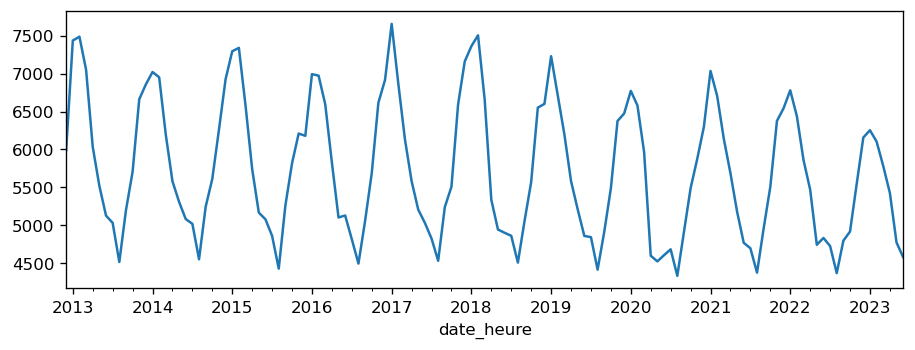

In [113]:
# c)
df.consommation_brute_electricite_rte.resample("M").mean().plot()

<AxesSubplot: xlabel='date_heure'>

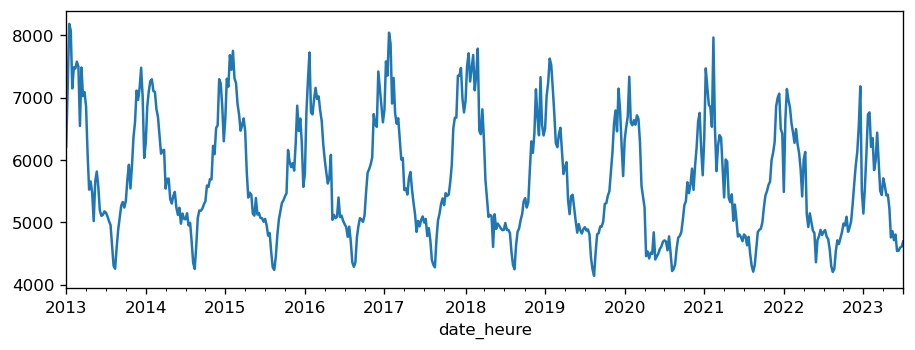

In [114]:
# d)
df.consommation_brute_electricite_rte.resample("W").mean().plot()

<AxesSubplot: xlabel='date_heure'>

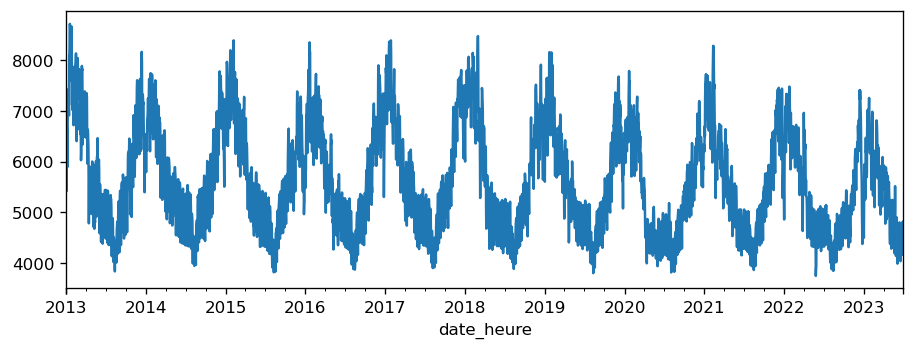

In [115]:
# e)
serie_q3 = df.consommation_brute_electricite_rte.resample("D").mean()
serie_q3.plot()

# Question 3

<AxesSubplot: xlabel='date_heure'>

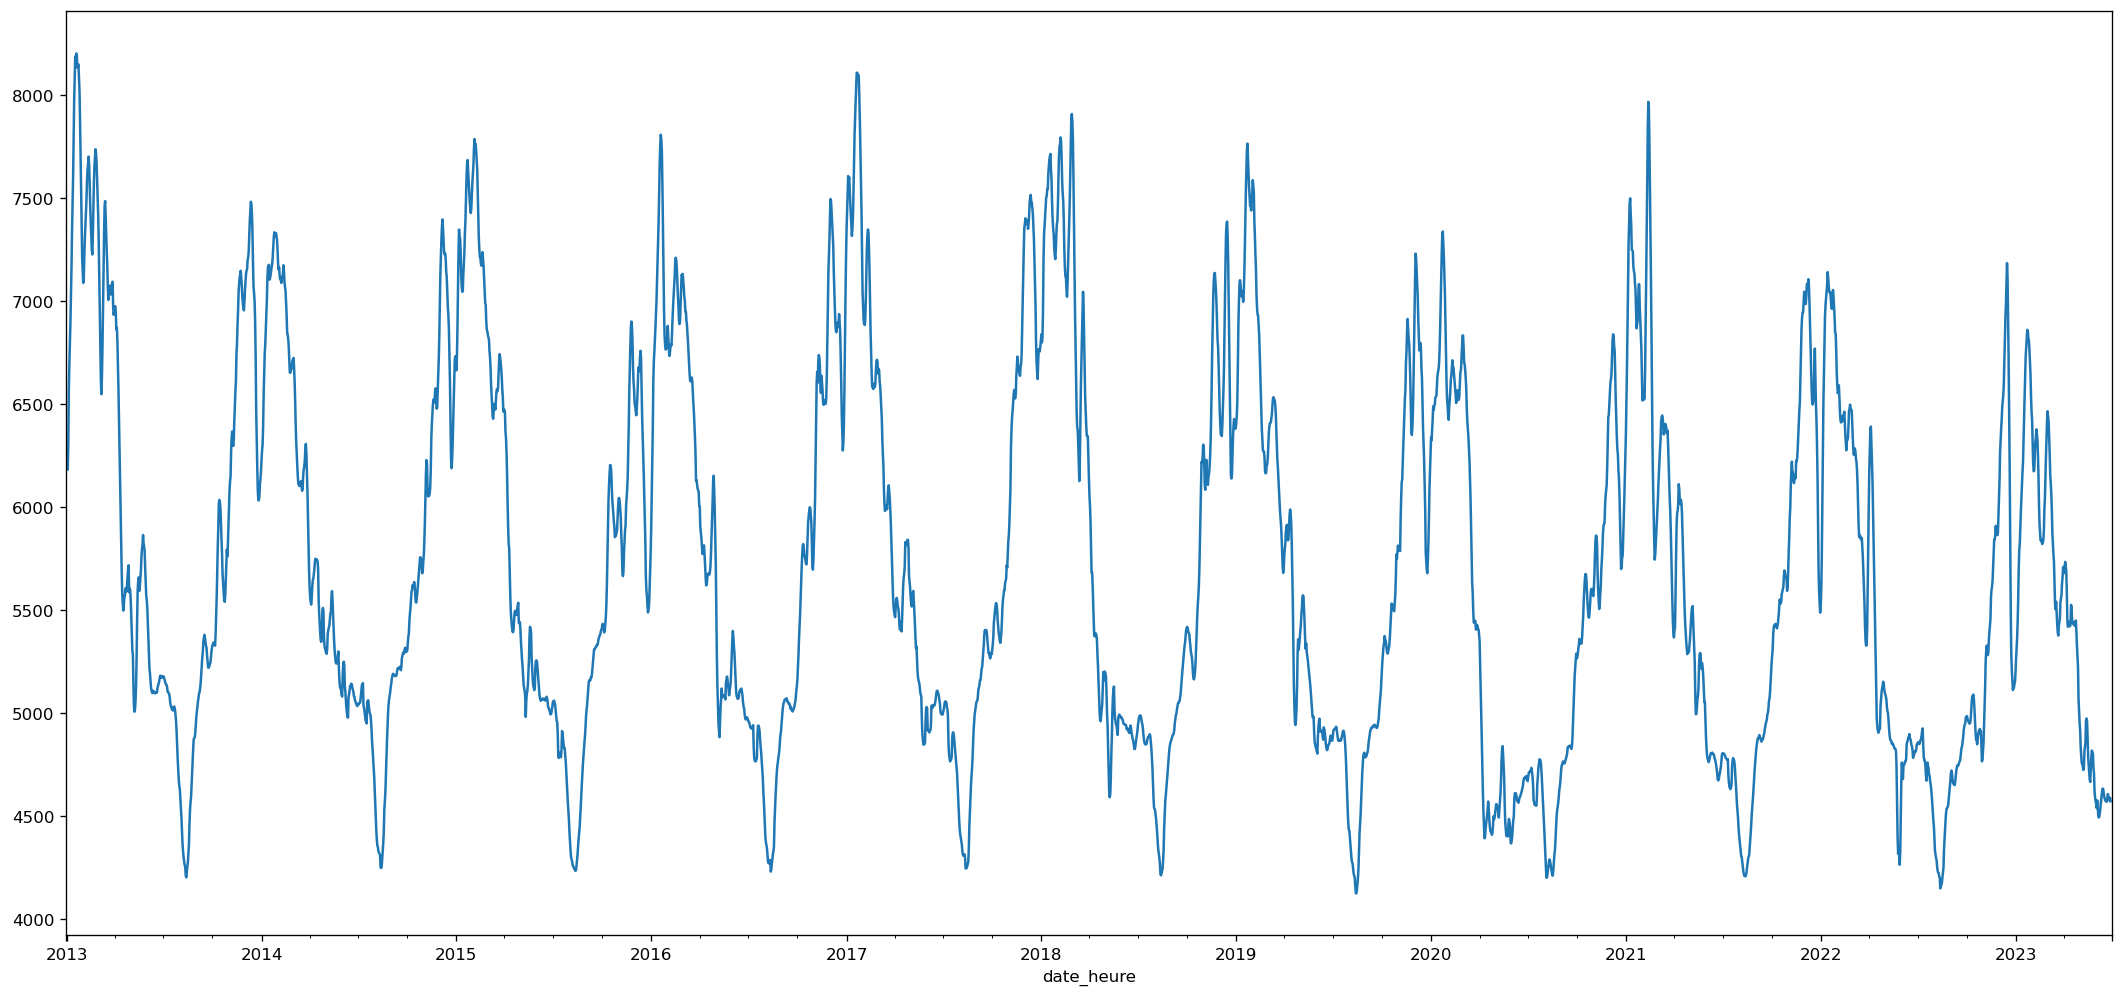

In [116]:
serie_q3 = serie_q3.sort_index()
plt.figure(figsize=(22,10))
serie_q3.rolling(window=7,center=True).mean().plot()

# Question 4

# Question 5

In [117]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['trimestre'] = df['date'].dt.quarter
df['mois'] = df['date'].dt.strftime('%b')
df['jour'] = df['date'].dt.weekday

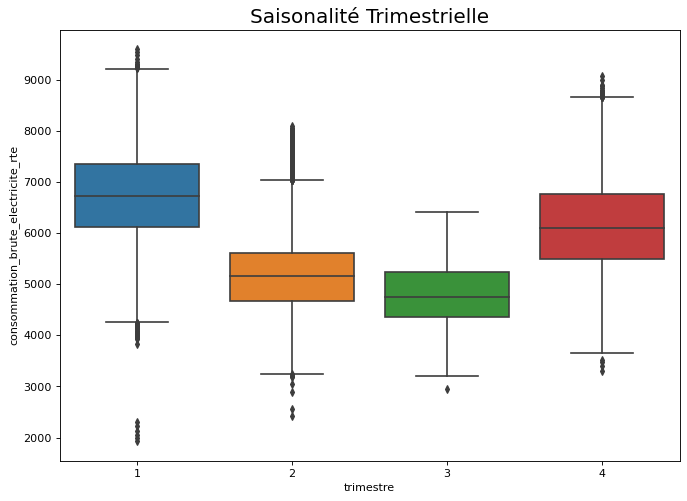

In [118]:
plt.figure(figsize=(10, 7), dpi=80)
sns.boxplot(x='trimestre', y='consommation_brute_electricite_rte', data=df)
plt.title('Saisonalité Trimestrielle', fontsize=18)

# Show the first figure
plt.show()

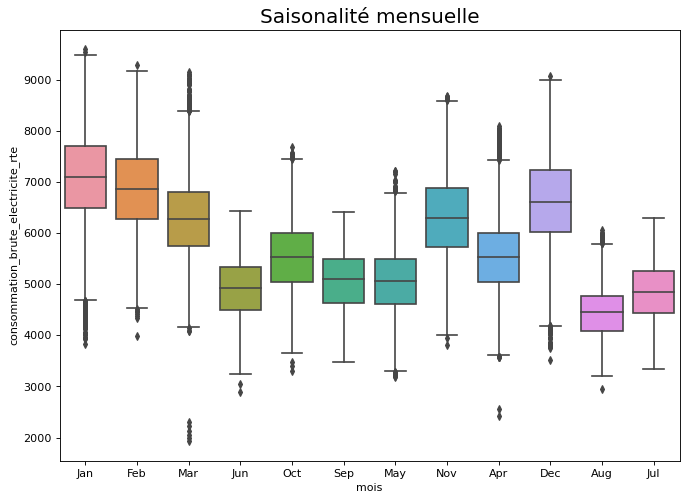

In [119]:
plt.figure(figsize=(10, 7), dpi=80)
sns.boxplot(x='mois', y='consommation_brute_electricite_rte', data=df)
plt.title('Saisonalité mensuelle', fontsize=18)

# Show the second figure
plt.show()


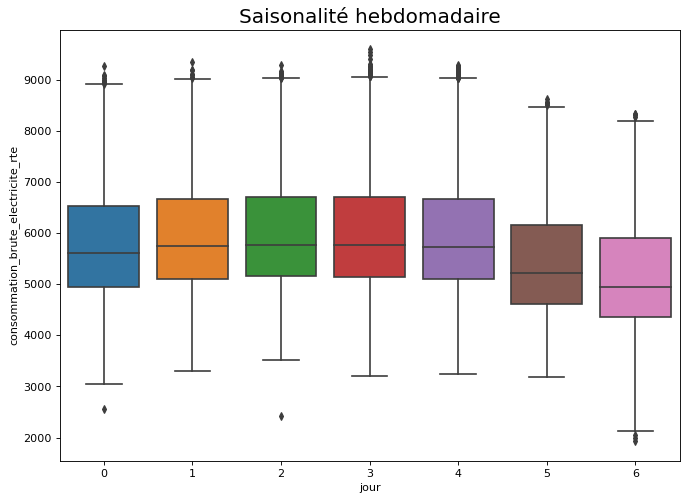

In [120]:
plt.figure(figsize=(10, 7), dpi=80)
sns.boxplot(x='jour', y='consommation_brute_electricite_rte', data=df)
plt.title('Saisonalité hebdomadaire', fontsize=18)

# Show the second figure
plt.show()

In [121]:
df['heure'] = pd.to_datetime(df['heure'], format='%H:%M')
df['heure'] = df['heure'].dt.floor('H').dt.strftime('%H:%M')
df.heure

date_heure
2013-01-21 10:00:00+00:00    11:00
2013-01-21 18:00:00+00:00    19:00
2013-01-21 19:00:00+00:00    20:00
2013-01-21 20:00:00+00:00    21:00
2013-01-21 22:00:00+00:00    23:00
                             ...  
2023-06-23 05:30:00+00:00    07:00
2023-06-23 08:00:00+00:00    10:00
2023-06-23 09:30:00+00:00    11:00
2023-06-23 10:30:00+00:00    12:00
2023-06-23 11:00:00+00:00    13:00
Name: heure, Length: 183983, dtype: object

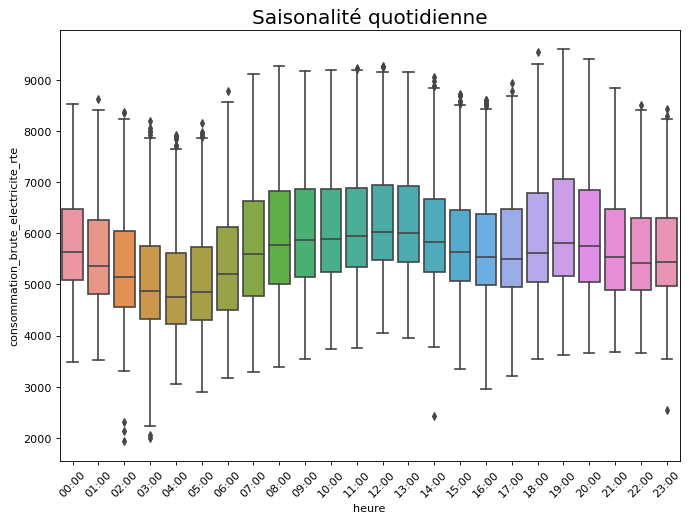

In [122]:
ordre = df.heure.unique()
ordre.sort()
result = df.groupby('heure')['consommation_brute_electricite_rte'].mean().reset_index()
plt.figure(figsize=(10, 7), dpi=80)
sns.boxplot(x='heure', y='consommation_brute_electricite_rte', data=df, order =ordre)
plt.title('Saisonalité quotidienne', fontsize=18)

# Show the second figure
plt.xticks(rotation=45)
plt.show()

# Question 6

<AxesSubplot: xlabel='date_heure'>

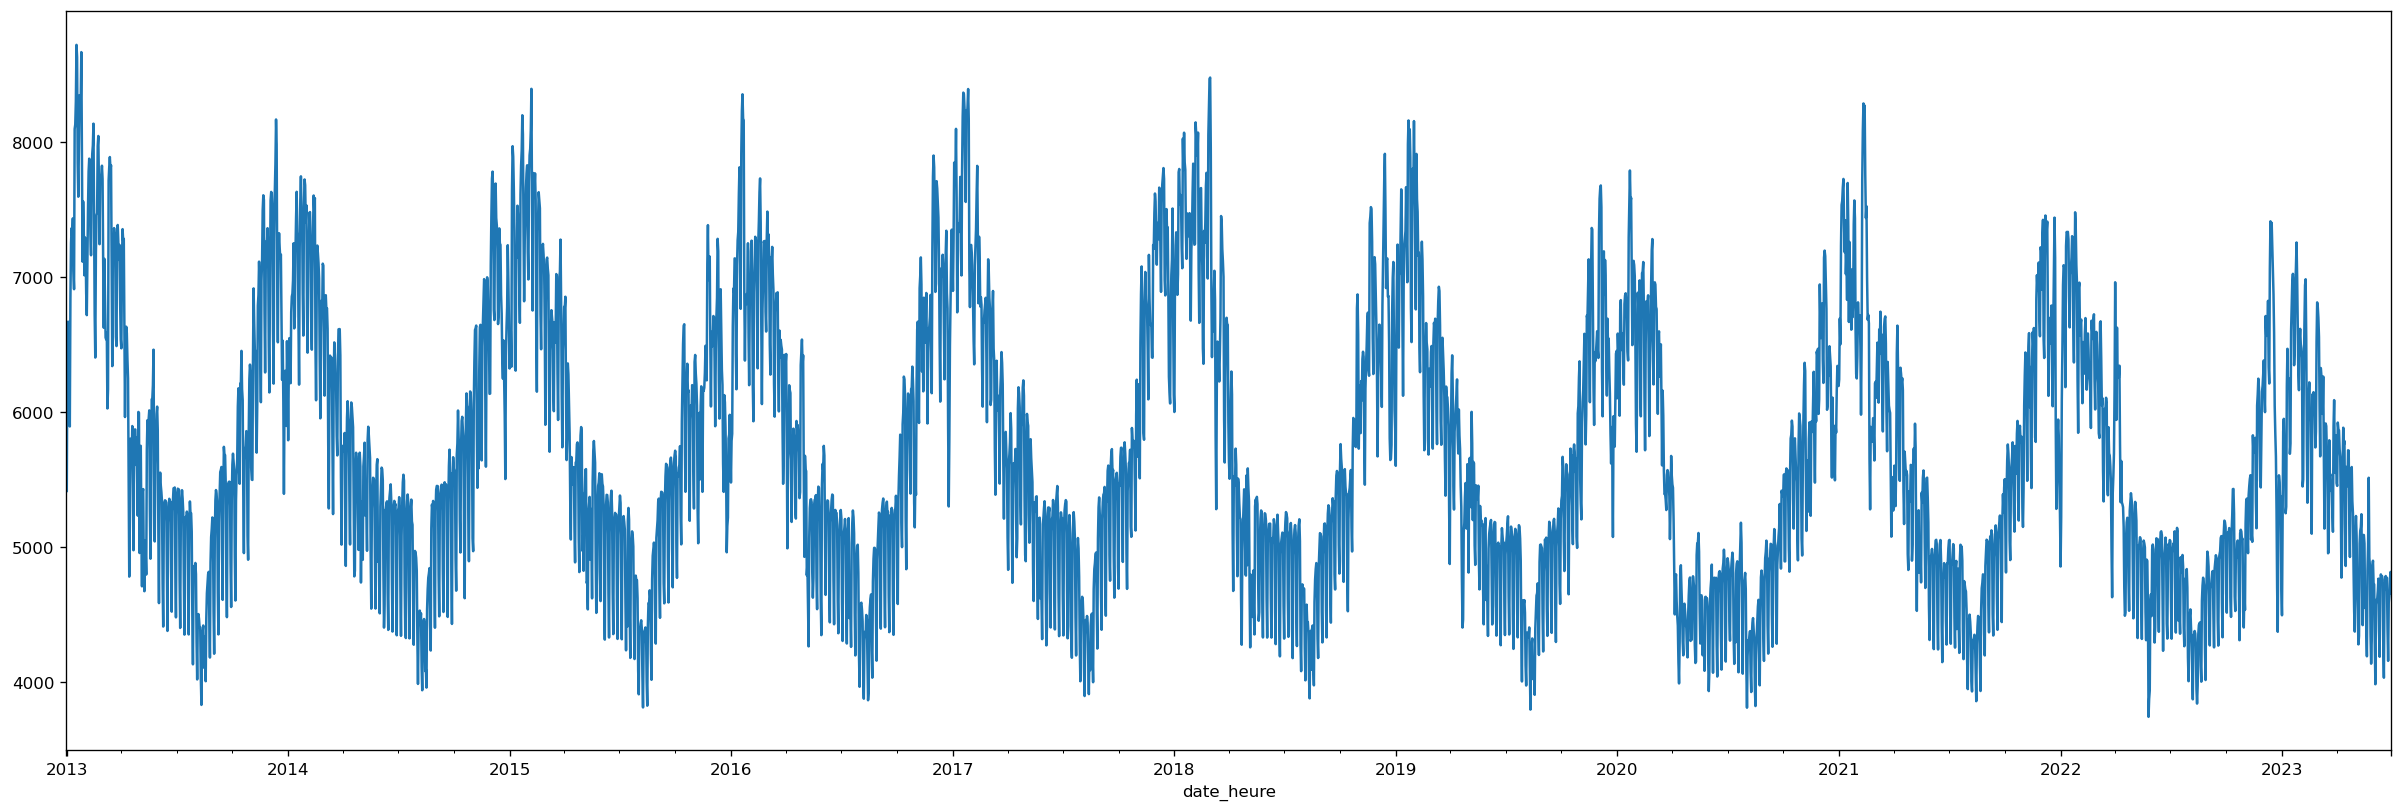

In [123]:
df_q3.plot(figsize=(25,8))

# Question 7

Le time series moyennisé par jour ne semble pas stationnaire car on reconnait des cycles et des motifs réguliers sur le time series

# Question 8

<AxesSubplot: xlabel='date_heure'>

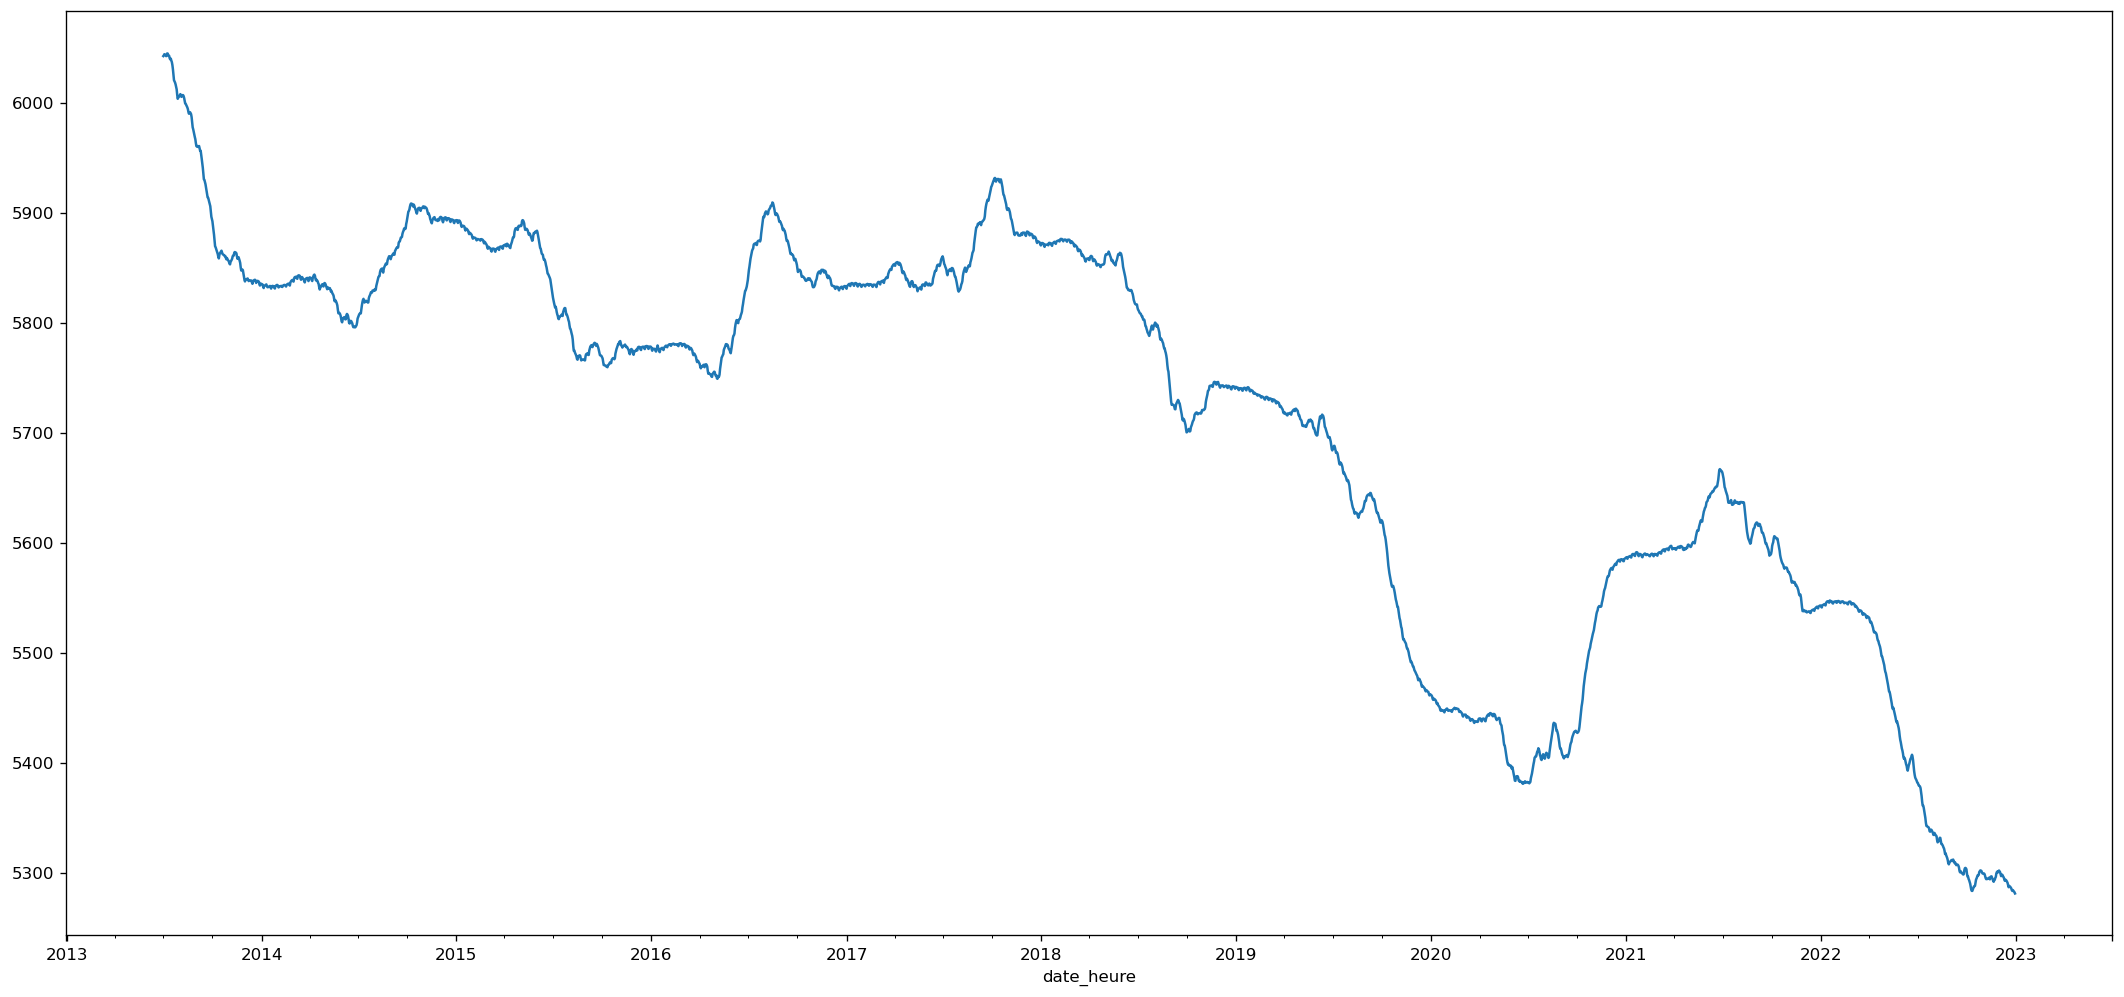

In [131]:
serie_q3 = serie_q3.sort_index()
plt.figure(figsize=(22,10))
serie_q3.rolling(window=365,center=True).mean().plot()